In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-eda')
jovian.set_colab_id('1AjMYSYabQSt7f712lERnftL9eYQAMpyT')

     |████████████████████████████████| 68 kB 6.0 MB/s 


# us-accidents-eda

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents-eda")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jagavirat1010/us-accidents-eda


'https://jovian.ai/jagavirat1010/us-accidents-eda'

## Exploratory Data Analysis - US Accidents


- Source - Kaggle

- Data - Contains the information about the US accidents (2016-2021)

### Downloading the data

In [ ]:
pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od
URL="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv"
od.download(URL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jagatheeswariravi
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:04<00:00, 66.7MB/s]


In [ ]:
data_filename="./us-accidents/US_Accidents_Dec21_updated.csv"

## Preparing the Data

- Load the data using Pandas
- Fix any missing or incorrect values in the Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.head(5)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

len(newdf.columns)

14

In [ ]:
missingvalues_percentage = df.isna().sum().sort_values(ascending=False) / len(df)

In [ ]:
missingvalues_percentage[missingvalues_percentage != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

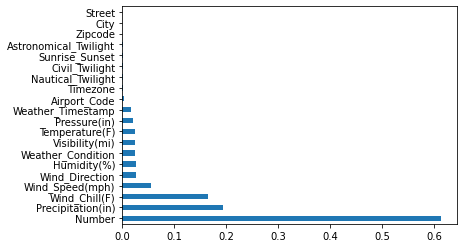

In [ ]:
missingvalues_percentage[missingvalues_percentage != 0].plot(kind="barh")

Remove the columns that does not affect the end result

Columns that we look into :
- city
- start time
- startlat,start lng
- Temperature


In [ ]:
len(df.City.unique())

11682

In [ ]:
cities_by_accident = df.City.value_counts()

In [ ]:
cities_by_accident[0:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
str1="New York"
str1 in cities_by_accident

True

In [ ]:
str1 in df.City.unique() 

True

## Which City has the higgest number of accidents?

In [ ]:
citywith_high_accident = cities_by_accident.sort_values(ascending=False)[0:20]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

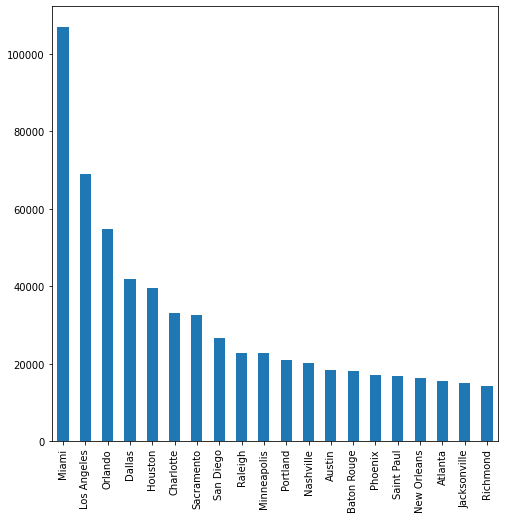

In [ ]:
ax,fig = plt.subplots(figsize=(8,8))
citywith_high_accident.plot(kind="bar")

- Miami has the highest number of accidents

In [ ]:
type(citywith_high_accident)

pandas.core.series.Series

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000]

In [ ]:
len(high_accident_cities)

496

In [ ]:
Low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(Low_accident_cities)

11185

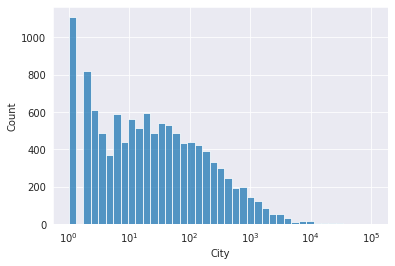

In [ ]:
sns.set_style("darkgrid")
sns.histplot(cities_by_accident,log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start Time

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df["Hour"] = df.Start_Time.dt.hour

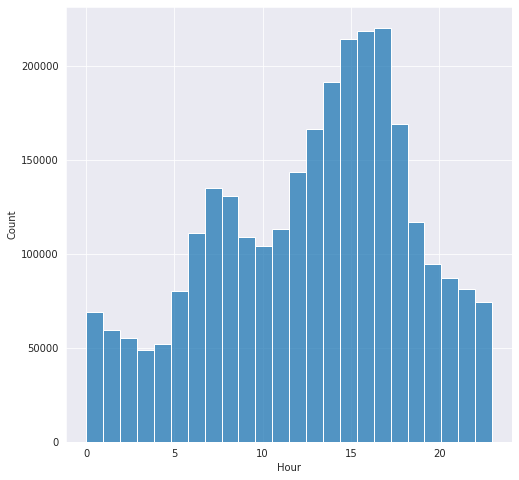

In [ ]:
ax,fig = plt.subplots(figsize=(8,8))
sns.histplot(df.Hour,bins=24)

### The most number odf accidents happening in 3:00 pm to 6:00 pm  and morning 8:00 am to 9:00am

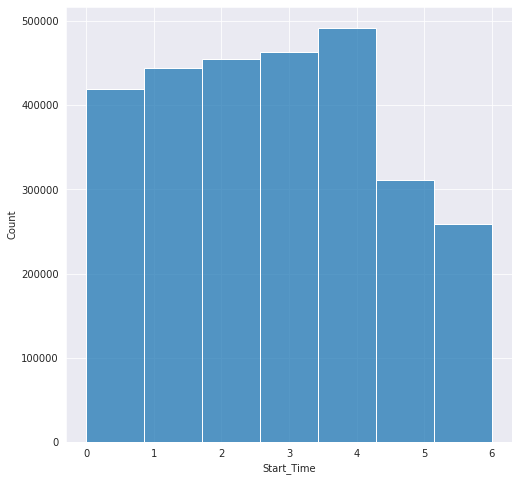

In [ ]:
ax,fig = plt.subplots(figsize=(8,8))
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


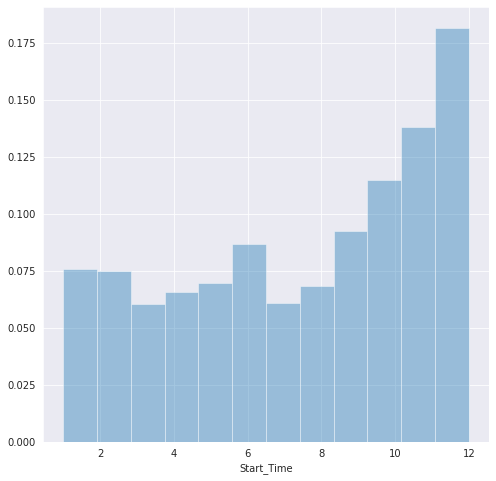

In [ ]:
ax,fig = plt.subplots(figsize=(8,8))
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

### Year wise Trend

In [ ]:
df_2016 = df[df.Start_Time.dt.year == 2016]

In [ ]:
df_2017 = df[df.Start_Time.dt.year == 2017]

In [ ]:
df_2018 = df[df.Start_Time.dt.year == 2018]

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]

In [ ]:
df_2020 = df[df.Start_Time.dt.year == 2020
             ]

In [ ]:
df_2021 = df[df.Start_Time.dt.year == 2021]

Text(0.5, 1.0, 'Accidents in 2019')

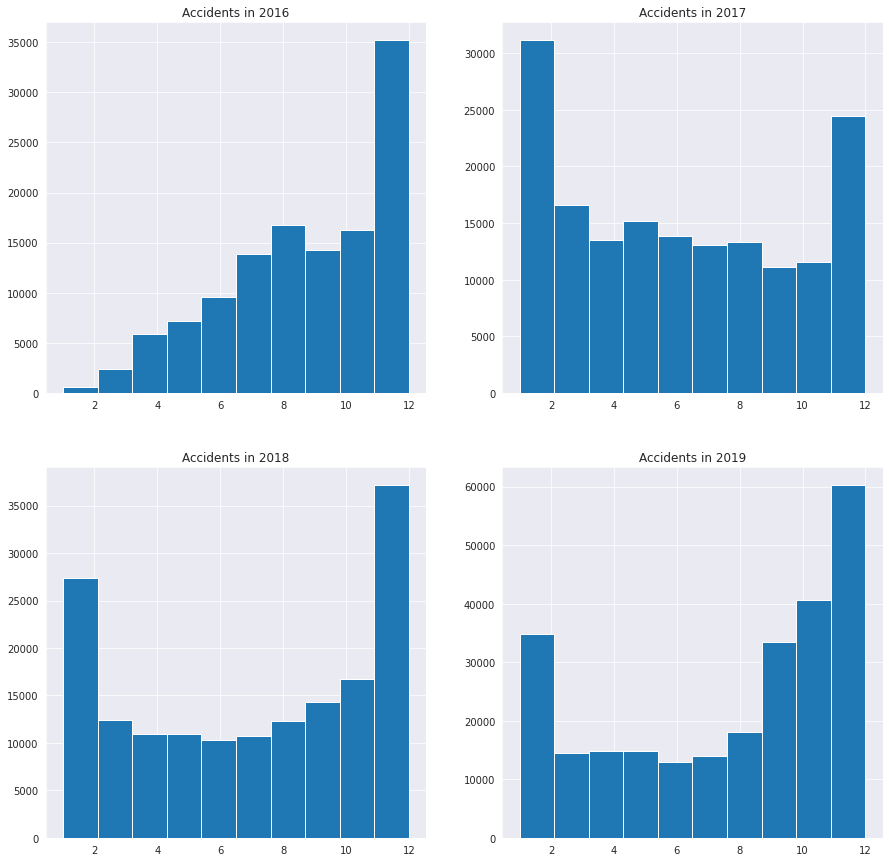

In [ ]:
figure, axis = plt.subplots(2, 2,figsize=(15,15))
axis[0,0].hist(df_2016.Start_Time.dt.month)
axis[0,0].set_title("Accidents in 2016")

axis[0,1].hist(df_2017.Start_Time.dt.month)
axis[0,1].set_title("Accidents in 2017")

axis[1,0].hist(df_2018.Start_Time.dt.month)
axis[1,0].set_title("Accidents in 2018")

axis[1,1].hist(df_2019.Start_Time.dt.month)
axis[1,1].set_title("Accidents in 2019")


In [ ]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour'],
      dtype='object')

In [ ]:
sample_df = df.sample(int(0.1*len(df)))

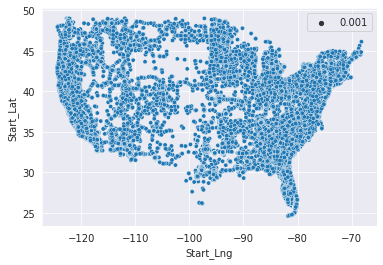

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap

In [ ]:
lat=list(sample_df.Start_Lat)
lng=list(sample_df.Start_Lng)
pairs = list(zip(lat,lng))
map = folium.Map()
HeatMap(pairs).add_to(map)
map

In [ ]:
lat

34.096581

## Ask Questions
- Are there more accidents in warmer areas or coolder ares?
- Which states has the highest number of accidents?
- On what time the most number of accidents has occured?
- Which day has the most number of accidents?
- The number of accidents are increasing or decreasing day by day?
- Why there is so much accidents in December month?



## Summary
 - Miami has the highest number of accidents
 - Around 500 Cities have more than 1000 accidents per year
 - Around 1100 cities have only one accident per year
 - Most number accidents are happening in evening 3:00 pm to 6:00 pm
 - The number of accidents during week days are Uniformly distributed
 -13% to 18% of accidents are happening during winter months that is November and December
 - The data for the year is very low.It means the system is being set in 2016
 - The accidents are more in coastal areas due to the high population in those areas